In [1]:
import pyMesa as pym
import numpy as np

In [2]:
rates_lib, rates_def = pym.loadMod("rates")
eos_lib, eos_def = pym.loadMod("eos")
const_lib, const_def = pym.loadMod("const")
math_lib, _ = pym.loadMod("math")
math_lib.math_init()
chem_lib, chem_def = pym.loadMod("chem")
net_lib, net_def = pym.loadMod("net")

In [3]:
#call the modules in the order in which they get compilied in when you compile MESA_DIR

ierr=0

const_lib.const_init(pym.MESA_DIR,ierr)

chem_lib.chem_init('isotopes.data',ierr)

eos_cac = 'cache/eosdt'
eos_lib.eos_init(eos_cac,False,ierr)

cac = 'cache/rates'
#rates_lib.rates_init('reactions.list','jina_reaclib_results_20130213default2','rate_tables',False,False,'','',cac,ierr)

net_lib.net_init(ierr)

 read  /userdata/data/bhat/D6/mesa-r23.05.1/data/eosDT_data/helm_table.dat


In [ ]:
chem_h1 = chem_def.ih1
chem_he3 = chem_def.ihe3
chem_he4 = chem_def.ihe4
chem_c12 = chem_def.ic12
chem_n14 = chem_def.in14
chem_o16 = chem_def.io16
chem_o18 = chem_def.io18
chem_ne20 = chem_def.ine20
chem_ne22 = chem_def.ine22
chem_mg24 = chem_def.img24
chem_si28 = chem_def.isi28
chem_fe56 = chem_def.ife56
chem_co56 = chem_def.ico56
chem_ni56 = chem_def.ini56





In [ ]:
net_h1 = net_lib.ih1
net_he3 = net_lib.ihe3
net_he4 = net_lib.ihe4
net_c12 = net_lib.ic12
net_n14 = net_lib.in14
net_o16 = net_lib.io16
net_o18 = net_lib.io18
net_ne20 = net_lib.ine20
net_ne22 = net_lib.ine22
net_mg24 = net_lib.img24
net_si28 = net_lib.isi28
net_fe56 = net_lib.ife56
net_co56 = net_lib.ico56
net_ni56 = net_lib.ini56


In [ ]:
eos_handle = eos_lib.alloc_eos_handle(ierr).result

In [ ]:
species = 14
chem_id = np.array([chem_h1,chem_he3,chem_he4,chem_c12,chem_n14,chem_o16,chem_o18,chem_ne20,chem_ne22,chem_mg24,chem_si28,chem_fe56,chem_co56,chem_ni56])
net_iso = np.array([net_h1,net_he3,net_he4,net_c12,net_n14,net_o16,net_o18,net_ne20,net_ne22,net_mg24,net_si28,net_fe56,net_co56,net_ni56])
xa = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0])
Rho = 10**8.0
logRho = 8.0
T = 10**9
logT = 9.0
res = np.zeros(eos_def.num_eos_basic_results)
d_dlnd = np.zeros(eos_def.num_eos_basic_results)
d_dlnT = np.zeros(eos_def.num_eos_basic_results)
d_dxa = np.zeros((eos_def.num_eos_basic_results,species))
ierr = 0

In [ ]:
entropy_donor = np.genfromtxt('input_data/entropy_donor_nocut.dat',skip_header=1)
entropy_remnant = np.genfromtxt('input_data/entropy_remnant_nocut.dat',skip_header=1)
entropy_eos_donor=[]
entropy_eos_remnant=[]
qmass_remnant=entropy_remnant[:,0]
qmass_donor=entropy_donor[:,0]

rho_file_donor=entropy_donor[:,1]
rho_file_remnant=entropy_remnant[:,1]
t_file_donor=entropy_donor[:,2]
t_file_remnant=entropy_remnant[:,2]



In [ ]:
composition_donor = np.genfromtxt('input_data/composition_donor_nocut.dat',skip_header=1)
composition_remnant = np.genfromtxt('input_data/composition_remnant_nocut.dat',skip_header=1)
mass_fractions_donor=composition_donor[:,1:15]
mass_fractions_remnant=composition_remnant[:,1:15]
print((mass_fractions_donor[0]))

[5.59871898e-18 0.00000000e+00 2.55354769e-01 3.72389719e-01
 3.08272199e-19 3.72215539e-01 0.00000000e+00 3.74292639e-05
 6.15946218e-21 2.35675559e-06 1.87236049e-07 0.00000000e+00
 0.00000000e+00 5.59859328e-29]


In [ ]:
i_lnS = eos_def.i_lns - 1
for i in range(len(rho_file_donor)):
    eos_res_donor = eos_lib.eosdt_get(
                   eos_handle, species, chem_id, net_iso, np.array(mass_fractions_donor[i]), 
                   rho_file_donor[i], np.log10(rho_file_donor[i]),t_file_donor[i], np.log10(t_file_donor[i]), 
                   res, d_dlnd, d_dlnT, d_dxa, ierr)
    entropy_eos_donor.append(np.exp(eos_res_donor[1]['res'][i_lnS]))
    eos_res_remnant = eos_lib.eosdt_get(
                   eos_handle, species, chem_id, net_iso, np.array(mass_fractions_remnant[i]), 
                   rho_file_remnant[i], np.log10(rho_file_remnant[i]),t_file_remnant[i], np.log10(t_file_remnant[i]), 
                   res, d_dlnd, d_dlnT, d_dxa, ierr)
    entropy_eos_remnant.append(np.exp(eos_res_remnant[1]['res'][i_lnS]))
#print(entropy_eos)

In [ ]:
print(mass_fractions_donor[:,2])

[2.55354769e-01 2.81481560e-01 3.08555523e-01 3.47160092e-01
 3.93314094e-01 4.61881258e-01 5.65129471e-01 7.00363893e-01
 7.97564499e-01 7.70522425e-01 6.49186647e-01 6.09213937e-01
 6.14918409e-01 5.54281447e-01 5.86654222e-01 6.73490722e-01
 6.95434316e-01 6.52648222e-01 5.79833548e-01 5.38929569e-01
 5.04229589e-01 4.88810236e-01 4.69632814e-01 4.48103413e-01
 4.20515903e-01 3.97975021e-01 3.80695249e-01 3.62867821e-01
 3.43812642e-01 3.38131027e-01 3.28639259e-01 3.03928531e-01
 3.10236193e-01 2.96488692e-01 2.93723779e-01 2.87022490e-01
 2.84363720e-01 2.78722780e-01 2.72539658e-01 2.82428582e-01
 2.77026091e-01 2.66526069e-01 2.78737730e-01 2.58490191e-01
 2.64664230e-01 2.64403179e-01 2.54301691e-01 2.67183821e-01
 2.60384709e-01 2.56476650e-01 2.54794819e-01 2.52357493e-01
 2.47716510e-01 2.39980320e-01 2.43929590e-01 2.48879881e-01
 2.39346962e-01 2.35905261e-01 2.38183179e-01 2.28507272e-01
 2.29866480e-01 2.22185410e-01 2.20751241e-01 2.24109748e-01
 2.15861509e-01 2.116693

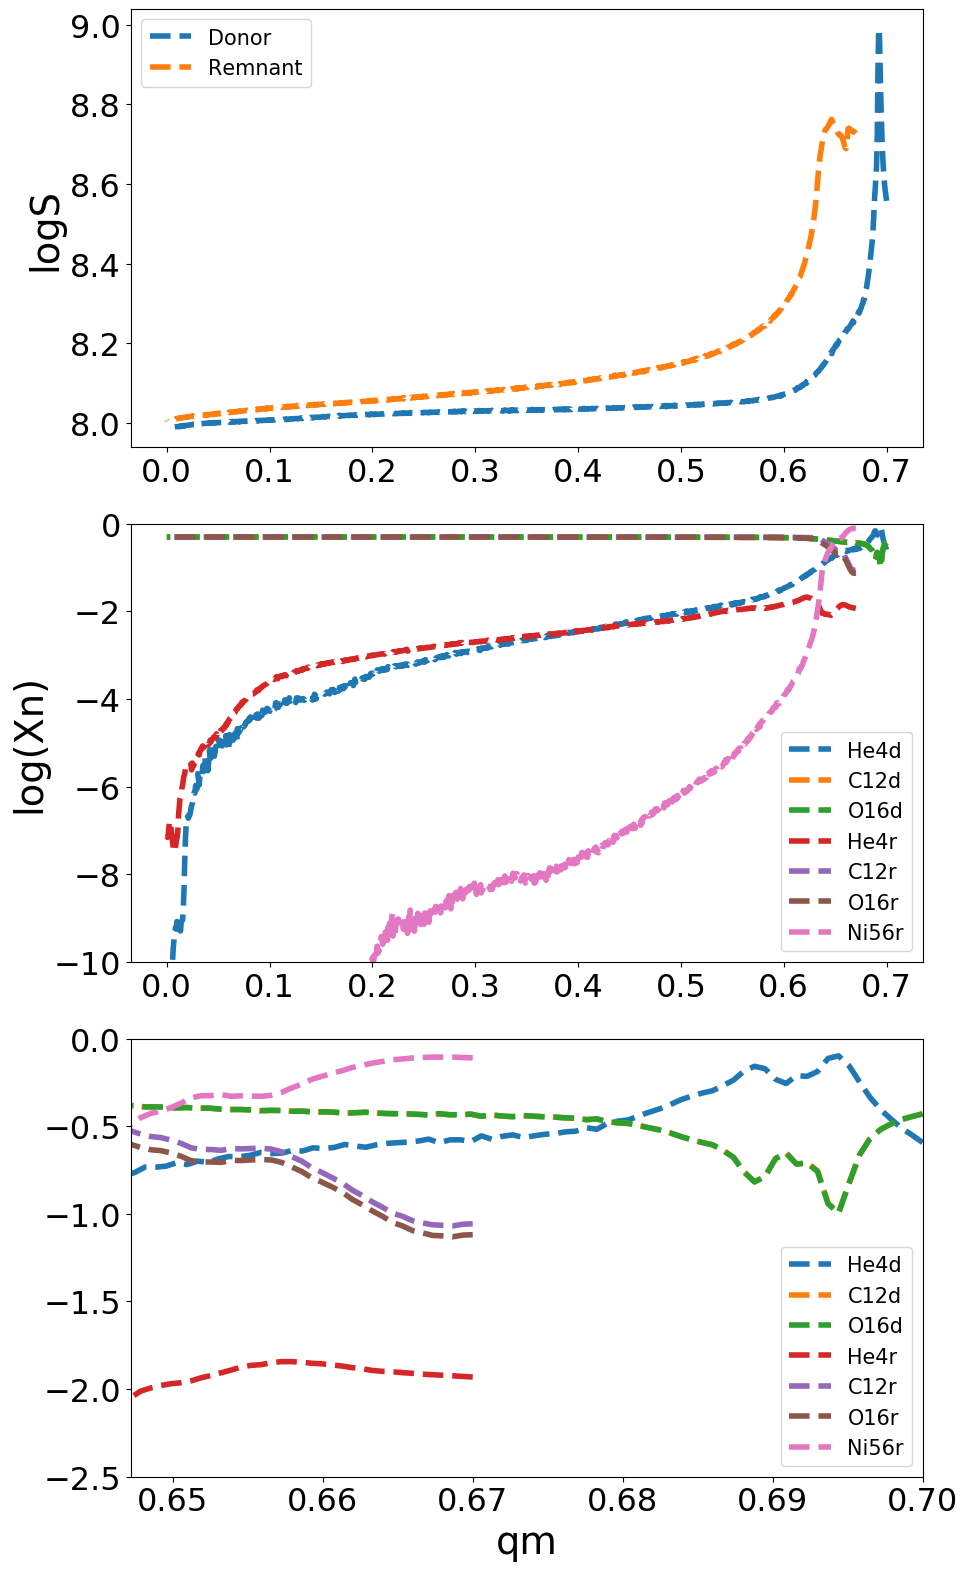

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"]=16
plt.rcParams["legend.fontsize"]=15
plt.rcParams['lines.linestyle']="--"
plt.rcParams['lines.linewidth']=4
fig, axs = plt.subplots(2,figsize=(10,16))
axs[0].plot((1-qmass_donor)*0.7,np.log10(entropy_eos_donor))
axs[0].plot((1-qmass_donor)*0.67,np.log10(entropy_eos_remnant))
#plt.plot(qmass,np.array(entropy_eos_donor)-np.array(entropy_eos_remnant))
axs[0].set_ylabel('logS')
axs[0].legend(['Donor','Remnant'])
axs[1].plot((1-qmass_donor)*0.7,np.log10(mass_fractions_donor[:,2]))
axs[1].plot((1-qmass_donor)*0.7,np.log10(mass_fractions_donor[:,3]))
axs[1].plot((1-qmass_donor)*0.7,np.log10(mass_fractions_donor[:,5]))
axs[1].plot((1-qmass_remnant)*0.67,np.log10(mass_fractions_remnant[:,2]))
axs[1].plot((1-qmass_remnant)*0.67,np.log10(mass_fractions_remnant[:,3]))
axs[1].plot((1-qmass_remnant)*0.67,np.log10(mass_fractions_remnant[:,5]))
axs[1].plot((1-qmass_remnant)*0.67,np.log10(mass_fractions_remnant[:,13]))
axs[1].legend(['He4d','C12d','O16d','He4r','C12r','O16r','Ni56r'])
axs[1].set_ylabel('log(Xn)')
axs[1].set_ylim(-10,0)
'''
axs[2].plot((1-qmass_donor)*0.7,np.log10(mass_fractions_donor[:,2]))
axs[2].plot((1-qmass_donor)*0.7,np.log10(mass_fractions_donor[:,3]))
axs[2].plot((1-qmass_donor)*0.7,np.log10(mass_fractions_donor[:,5]))
axs[2].plot((1-qmass_remnant)*0.67,np.log10(mass_fractions_remnant[:,2]))
axs[2].plot((1-qmass_remnant)*0.67,np.log10(mass_fractions_remnant[:,3]))
axs[2].plot((1-qmass_remnant)*0.67,np.log10(mass_fractions_remnant[:,5]))
axs[2].plot((1-qmass_remnant)*0.67,np.log10(mass_fractions_remnant[:,13]))
axs[2].legend(['He4d','C12d','O16d','He4r','C12r','O16r','Ni56r'])
index=np.where(mass_fractions_remnant[:,13]>mass_fractions_remnant[:,3])[0][-1]
axs[2].set_xlim((1-qmass_remnant[index])*0.67,0.7)
axs[2].set_ylim(-2.5,0)
'''
plt.xlabel('Mass coordinate (Msun)')
plt.tight_layout()
plt.savefig('/userdata/data/bhat/D6/KavliSP23/Report/Plots/entropy_composition_comparison.pdf')



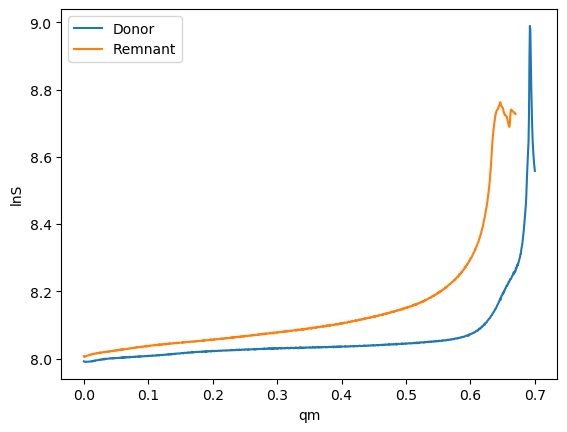

In [13]:
import matplotlib.pyplot as plt
plt.plot((1-qmass_donor)*0.7,np.log10(entropy_eos_donor))
plt.plot((1-qmass_donor)*0.67,np.log10(entropy_eos_remnant))
#plt.plot(qmass,np.array(entropy_eos_donor)-np.array(entropy_eos_remnant))
plt.ylabel('lnS')
plt.xlabel('qm')
plt.legend(['Donor','Remnant'])

In [11]:
eos_res[1]['res']

array([ 5.93543995e+01,  4.18153441e+01,  2.06742407e+01,  5.00000000e-01,
        0.00000000e+00,  2.23452269e+01,  2.47920602e-01,  1.32797172e+00,
        8.69803249e-02,  1.58207133e+08,  1.54795520e+08,  5.46747260e+09,
        1.54795520e-01, -5.20867794e-01,  1.35723952e+00,  1.33648764e+00,
        1.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [14]:
print(i_lnS)

2


In [13]:
np.exp(eos_res[1]['res'][i_lnS])

952157214.7621322